## [주제] 영화의 다양한 특성들을 기반으로 **수익**을 예측하는 모델

### 파일 및 리소스 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('df3.csv')

### 데이터 전처리 및 EDA

In [2]:
df.head()

,Unnamed: 0,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew,first_genre
0,0,237000000,http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners,...,English,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{'character': 'Jake Sully', 'gender': 'M', 'n...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures,...,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{'character': 'Captain Jack Sparrow', 'gender...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Columbia Pictures,...,Français,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{'character': 'James Bond', 'gender': 'M', 'n...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,Legendary Pictures,...,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{'character': 'Bruce Wayne / Batman', 'gender...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Action
4,4,260000000,http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,...,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{'character': 'John Carter', 'gender': 'M', '...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Action


In [3]:
# 원하는 피처만 남기고 제거
df = df[['budget', 'popularity', 'revenue', 'vote_average', 'first_genre']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4803 non-null   int64  
 1   popularity    4803 non-null   float64
 2   revenue       4803 non-null   int64  
 3   vote_average  4803 non-null   float64
 4   first_genre   4775 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 187.7+ KB


#### 결측치 제거

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4775 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4775 non-null   int64  
 1   popularity    4775 non-null   float64
 2   revenue       4775 non-null   int64  
 3   vote_average  4775 non-null   float64
 4   first_genre   4775 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 223.8+ KB


In [6]:
df.describe()

,budget,popularity,revenue,vote_average
count,4.775000e+03,4775.000000,4.775000e+03,4775.000000
mean,2.921458e+07,21.617344,8.274265e+07,6.114199
std,4.078120e+07,31.867749,1.632119e+08,1.140636
min,0.000000e+00,0.000372,0.000000e+00,0.000000
25%,9.500000e+05,4.806600,0.000000e+00,5.600000
50%,1.500000e+07,13.119133,1.947206e+07,6.200000
75%,4.000000e+07,28.499077,9.357130e+07,6.800000
max,3.800000e+08,875.581305,2.787965e+09,10.000000


#### 이상치 제거

In [7]:
# 수익이 0인 칼럼들 살펴보기
revenue_0 = df[df['revenue']==0]
revenue_0.describe()
df = df[df['revenue']>0]

In [8]:
# 예산이 0인 칼럼들 살펴보기
budget_0 = df[df['budget']==0]
budget_0.describe()
df = df[df['budget']>0]

In [9]:
# 유명도가 0인 칼럼들 살펴보기
popularity_0 = df[df['popularity']==0]
popularity_0.describe()
df = df[df['popularity']>0]

#### 수익 로그 변환

C:\Users\김찬은\AppData\Local\Temp\ipykernel_10348\2126767789.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["revenue"],label="revenue")
C:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


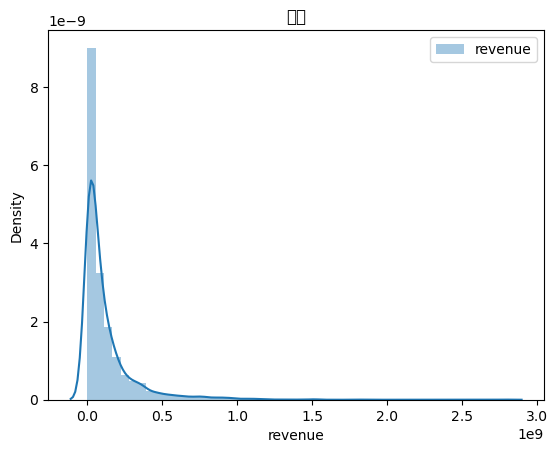

C:\Users\김찬은\AppData\Local\Temp\ipykernel_10348\2126767789.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["revenue"],label='revenue')


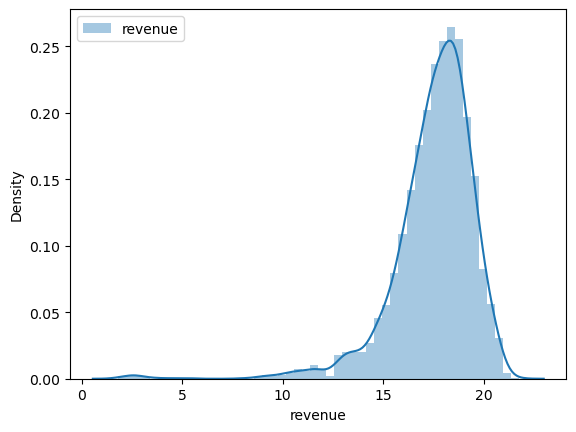

In [10]:
# 원본값의 distplot그래프
sns.distplot(df["revenue"],label="revenue")
plt.title('수익')
#각 선에 라벨링 표기
plt.legend()
plt.show()

#log를 이용해 변환
df['revenue'] = np.log1p(df["revenue"])

# log값의 distplot그래프
sns.distplot(df["revenue"],label='revenue')
plt.legend()
plt.show()

### 카테고리형 원-핫 인코딩

In [11]:
df[['first_genre']].value_counts()

first_genre    
Drama              747
Comedy             634
Action             588
Adventure          288
Horror             197
Crime              141
Thriller           118
Animation           99
Fantasy             93
Science Fiction     79
Romance             70
Family              38
Documentary         30
Mystery             27
Western             22
Music               20
History             18
War                 18
Foreign              1
Name: count, dtype: int64

In [12]:
# 수익과 장르의 연관성 보기
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df['rank'] = pd.qcut(df['revenue'], 7, labels)

In [14]:
genre_avg_revenue = df.groupby('first_genre')['revenue'].mean()
genre_avg_revenue

first_genre
Action             17.890130
Adventure          18.426403
Animation          18.776040
Comedy             17.313461
Crime              17.116408
Documentary        15.552937
Drama              16.910159
Family             18.343196
Fantasy            18.136936
Foreign            11.619994
History            17.534296
Horror             17.382148
Music              17.081685
Mystery            17.082288
Romance            17.288277
Science Fiction    18.076015
Thriller           17.303240
War                16.796577
Western            16.841501
Name: revenue, dtype: float64

In [19]:
df[['first_genre']] = df[['first_genre']].replace({'Foreign':'etc','TV Movie':'etc', 'History':'etc', 'War':'etc', 'Western':'etc', 
                                                   'Music':'etc', 'Family':'etc', 'Mystery':'etc', 'Documentary':'etc'})

In [20]:
df[['first_genre']].value_counts()

first_genre    
Drama              747
Comedy             634
Action             588
Adventure          288
Horror             197
etc                174
Crime              141
Thriller           118
Animation           99
Fantasy             93
Science Fiction     79
Romance             70
Name: count, dtype: int64

In [21]:
df = pd.get_dummies(df, columns = ['first_genre'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3228 entries, 0 to 4798
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   budget                       3228 non-null   int64   
 1   popularity                   3228 non-null   float64 
 2   revenue                      3228 non-null   float64 
 3   vote_average                 3228 non-null   float64 
 4   rank                         3228 non-null   category
 5   first_genre_Action           3228 non-null   bool    
 6   first_genre_Adventure        3228 non-null   bool    
 7   first_genre_Animation        3228 non-null   bool    
 8   first_genre_Comedy           3228 non-null   bool    
 9   first_genre_Crime            3228 non-null   bool    
 10  first_genre_Drama            3228 non-null   bool    
 11  first_genre_Fantasy          3228 non-null   bool    
 12  first_genre_Horror           3228 non-null   bool    
 13  first_ge

### 회귀

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(labels=['revenue', 'rank'], axis=1)
y = df['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2259, 15) (969, 15) (2259,) (969,)


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

In [26]:
# 선형 회귀

model = LinearRegression()
model.fit(X_train, y_train)
lr_pred = model.predict(X_test)
print('### 선형 회귀 ###')
evaluate_regr(y_test, lr_pred)

### 선형 회귀 ###
RMSLE: 0.111, RMSE: 1.547, MAE: 1.064


In [27]:
# 릿지, 라쏘 회귀

ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
r_pred = ridge_reg.predict(X_test)
print('### 릿지 회귀 ###')
evaluate_regr(y_test, r_pred)

### 릿지 회귀 ###
RMSLE: 0.111, RMSE: 1.546, MAE: 1.063


C:\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.24652e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [28]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)
l_pred = lasso_reg.predict(X_test)
print('### 라쏘 회귀 ###')
evaluate_regr(y_test, l_pred)

### 라쏘 회귀 ###
RMSLE: 0.111, RMSE: 1.546, MAE: 1.064


In [29]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

In [30]:
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
print('### 랜덤 포레스트 회귀 ###')
evaluate_regr(y_test, rf_pred)

### 랜덤 포레스트 회귀 ###
RMSLE: 0.094, RMSE: 1.362, MAE: 0.923


In [31]:
gbm_reg.fit(X_train, y_train)
gbm_pred = gbm_reg.predict(X_test)
print('### GBM 회귀 ###')
evaluate_regr(y_test, gbm_pred)

### GBM 회귀 ###
RMSLE: 0.101, RMSE: 1.453, MAE: 0.947


In [32]:
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
print('### xgboost 회귀 ###')
evaluate_regr(y_test, xgb_pred)

### xgboost 회귀 ###
RMSLE: 0.104, RMSE: 1.515, MAE: 1.016


In [33]:
lgbm_reg.fit(X_train, y_train)
lgbm_pred = lgbm_reg.predict(X_test)
print('### lightGBM 회귀 ###')
evaluate_regr(y_test, lgbm_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 540
[LightGBM] [Info] Number of data points in the train set: 2259, number of used features: 15
[LightGBM] [Info] Start training from score 17.476668
### lightGBM 회귀 ###
RMSLE: 0.112, RMSE: 1.554, MAE: 1.031


In [34]:
pred = rf_pred * 0.75 + gbm_pred * 0.25
evaluate_regr(y_test, pred)

RMSLE: 0.094, RMSE: 1.358, MAE: 0.915


## 최종 혼합 모델의 평가 지표는 RMSLE: 0.094, RMSE: 1.354, MAE: 0.912 이다.